# IMPORTING NECESSARY LIBRARIES

In [1]:
!pip install tweet-preprocessor


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Load dataset
df = pd.read_csv('text.csv')
#df = df.sample(frac=0.5)


In [4]:
df.tail(10)

,Unnamed: 0,text,label
416799,416799,i feel that i must confess even though it kill...,5
416800,416800,i don t know why today i feel like it looks ve...,1
416801,416801,i don t even feel like i fully resolved it but...,1
416802,416802,i feel like i have been neglecting you my fait...,1
416803,416803,i cry and feel a sense of loss when my patient...,1
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


# DATA PREPROCESSING

In [5]:
import preprocessor as p

In [6]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [7]:
def preprocessing(a):
    tmp = []
    for line in a:
        tmp1 = p.clean(line)
        tmp1 = REPLACE_NO_SPACE.sub("", tmp1.lower()) # convert all tweets to lower cases
        tmp1 = REPLACE_WITH_SPACE.sub(" ", tmp1)
        tmp.append(tmp1)
    return tmp

In [8]:
train_data = preprocessing(df["text"])
train_data = pd.DataFrame(train_data)

In [9]:
df["preprocessing"] = train_data

#compare normal and preprocessed data
df.head(10)

,Unnamed: 0,text,label,preprocessing
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,3,i dont know i feel so lost,0,i dont know i feel so lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...
5,5,i was beginning to feel quite disheartened,0,i was beginning to feel quite disheartened
6,6,i would think that whomever would be lucky eno...,2,i would think that whomever would be lucky eno...
7,7,i fear that they won t ever feel that deliciou...,1,i fear that they won t ever feel that deliciou...
8,8,im forever taking some time out to have a lie ...,5,im forever taking some time out to have a lie ...
9,9,i can still lose the weight without feeling de...,0,i can still lose the weight without feeling de...


In [10]:
'''# Lowercasing
df['text'] = df['text'].str.lower()

# Tokenization
df['tokens'] = df['text'].apply(word_tokenize)

# Removing Punctuation
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in string.punctuation])

# Removing Stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Join tokens back into sentences
df['processed_text'] = df['tokens'].apply(' '.join)

# Print the first few rows to check the result
print(df.head(20))'''



"# Lowercasing\ndf['text'] = df['text'].str.lower()\n\n# Tokenization\ndf['tokens'] = df['text'].apply(word_tokenize)\n\n# Removing Punctuation\ndf['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in string.punctuation])\n\n# Removing Stopwords\nstop_words = set(stopwords.words('english'))\ndf['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])\n\n# Stemming\nstemmer = PorterStemmer()\ndf['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])\n\n# Join tokens back into sentences\ndf['processed_text'] = df['tokens'].apply(' '.join)\n\n# Print the first few rows to check the result\nprint(df.head(20))"

In [11]:
print(df.tail(5))

        Unnamed: 0                                               text  label  \
416804      416804  i feel like telling these horny devils to find...      2   
416805      416805  i began to realize that when i was feeling agi...      3   
416806      416806  i feel very curious be why previous early dawn...      5   
416807      416807  i feel that becuase of the tyranical nature of...      3   
416808      416808  i think that after i had spent some time inves...      5   

                                            preprocessing  
416804  i feel like telling these horny devils to find...  
416805  i began to realize that when i was feeling agi...  
416806  i feel very curious be why previous early dawn...  
416807  i feel that becuase of the tyranical nature of...  
416808  i think that after i had spent some time inves...  


In [12]:
# Define the mapping between emotion labels and sentiment labels
emotion_to_sentiment = {
    0: 0,  # sadness
    1: 1,  # joy
    2: 1,  # love
    3: 0,  # anger
    4: 2,   # fear
    5: 2    # surprise
}

# Map emotion labels to sentiment labels and create a new column 'sentiment'
df['sentiment'] = df['label'].map(emotion_to_sentiment)

# Print the first few rows to check the result
print(df.head())


   Unnamed: 0                                               text  label  \
0           0      i just feel really helpless and heavy hearted      4   
1           1  ive enjoyed being able to slouch about relax a...      0   
2           2  i gave up my internship with the dmrg and am f...      4   
3           3                         i dont know i feel so lost      0   
4           4  i am a kindergarten teacher and i am thoroughl...      4   

                                       preprocessing  sentiment  
0      i just feel really helpless and heavy hearted          2  
1  ive enjoyed being able to slouch about relax a...          0  
2  i gave up my internship with the dmrg and am f...          2  
3                         i dont know i feel so lost          0  
4  i am a kindergarten teacher and i am thoroughl...          2  


In [13]:
print(df.head(50))

    Unnamed: 0                                               text  label  \
0            0      i just feel really helpless and heavy hearted      4   
1            1  ive enjoyed being able to slouch about relax a...      0   
2            2  i gave up my internship with the dmrg and am f...      4   
3            3                         i dont know i feel so lost      0   
4            4  i am a kindergarten teacher and i am thoroughl...      4   
5            5         i was beginning to feel quite disheartened      0   
6            6  i would think that whomever would be lucky eno...      2   
7            7  i fear that they won t ever feel that deliciou...      1   
8            8  im forever taking some time out to have a lie ...      5   
9            9  i can still lose the weight without feeling de...      0   
10          10  i try to be nice though so if you get a bitchy...      1   
11          11  im feeling a little like a damaged tree and th...      0   
12          

# EDA (EXPLORATORY DATA ANALYSIS)

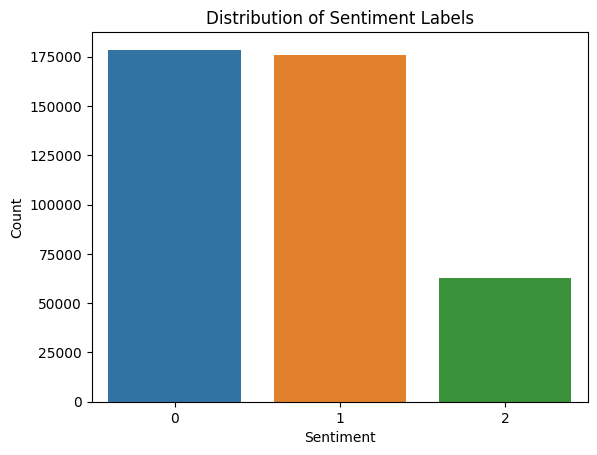

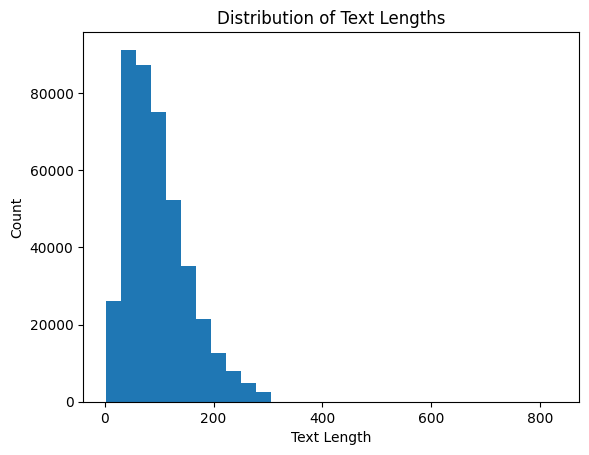

"# Explore word frequency in the dataset\nfrom collections import Counter\nwords = [word for sublist in df['preprocessing'] for word in sublist]\nword_freq = Counter(words)\ncommon_words = word_freq.most_common(20)\ncommon_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Frequency', y='Word', data=common_words_df)\nplt.title('Top 20 Most Common Words')\nplt.xlabel('Frequency')\nplt.ylabel('Word')\nplt.show()"

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
# Assuming df is your DataFrame containing the preprocessed data
# df = pd.read_csv('preprocessed_data.csv')

# Explore the distribution of sentiment labels
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Explore the distribution of text lengths
df['text_length'] = df['text'].apply(len)
plt.hist(df['text_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

'''# Explore word frequency in the dataset
from collections import Counter
words = [word for sublist in df['preprocessing'] for word in sublist]
word_freq = Counter(words)
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()'''


In [15]:
df.sample(10)

,Unnamed: 0,text,label,preprocessing,sentiment,text_length
314870,314870,i have no sex drive no desire to please to sub...,1,i have no sex drive no desire to please to sub...,1,199
63408,63408,i also express to my brother that if you got i...,3,i also express to my brother that if you got i...,0,112
188310,188310,i feel that if we were to conclude that then w...,1,i feel that if we were to conclude that then w...,1,117
202752,202752,i did however get some words down more than iv...,1,i did however get some words down more than iv...,1,108
182441,182441,i remember that people lost their lives in tho...,3,i remember that people lost their lives in tho...,0,127
180016,180016,i feel so lame having a blog,0,i feel so lame having a blog,0,28
318352,318352,i look at pictures of moments cherished in cel...,0,i look at pictures of moments cherished in cel...,0,148
68868,68868,i feel completely stressed while they just cal...,0,i feel completely stressed while they just cal...,0,117
334010,334010,i feel like voting is a very important thing f...,1,i feel like voting is a very important thing f...,1,79
336582,336582,ive not been feeling too adventurous as you wi...,1,ive not been feeling too adventurous as you wi...,1,52


In [16]:
df.columns

Index(['Unnamed: 0', 'text', 'label', 'preprocessing', 'sentiment',
       'text_length'],
      dtype='object')

# Preprocess the Test Set

In [17]:
#test_set = pd.read_csv('text_emotion.csv')

In [18]:
#features = df.drop(columns=['text', 'label', 'tokens', 'processed_text'])
labels = df['sentiment']


# SPLIT THE DATASET

In [19]:
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.preprocessing.values, labels, test_size=0.1, random_state=4, shuffle=True)



# Display the shapes of the training and testing sets
#X_train.shape # (333447, 1003)


In [20]:
X_train

array(['i wonder if this tweezing is a symptom of some obsessive compulsive issue but i don t want to make my daughter feel insecure by asking her about it',
       'id started to feel a bit less stressed out as he led me out of the truck into the daylight',
       'i manage to keep my self clinging from this my reality i sometimes i should say lately most of the times i feel exhausted and i think there is absolutely no need for me to stay in here',
       ...,
       'i have found my faith being tested i have always overcome those times feeling stronger and reassured by my faith but it hasnt been an easy road to get there',
       'i never know if i should feel happy or sad about that',
       'i really needed the fire re lit and the strength to keep moving forward and i m so grateful to feel that gentle shove forward again'],
      dtype=object)

In [21]:
X_train.shape

(375128,)

In [22]:
print(labels.head())
print(labels.shape)



0    2
1    0
2    2
3    0
4    2
Name: sentiment, dtype: int64
(416809,)


In [23]:
'''labels_new = labels.iloc[:, 0]

print(labels_new.head())
print(labels_new.shape)'''



'labels_new = labels.iloc[:, 0]\n\nprint(labels_new.head())\nprint(labels_new.shape)'

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375128,)
(41681,)
(375128,)
(41681,)


In [25]:
print (X_train)
print (y_test)

['i wonder if this tweezing is a symptom of some obsessive compulsive issue but i don t want to make my daughter feel insecure by asking her about it'
 'id started to feel a bit less stressed out as he led me out of the truck into the daylight'
 'i manage to keep my self clinging from this my reality i sometimes i should say lately most of the times i feel exhausted and i think there is absolutely no need for me to stay in here'
 ...
 'i have found my faith being tested i have always overcome those times feeling stronger and reassured by my faith but it hasnt been an easy road to get there'
 'i never know if i should feel happy or sad about that'
 'i really needed the fire re lit and the strength to keep moving forward and i m so grateful to feel that gentle shove forward again']
33258     0
365800    0
309322    1
43720     0
95056     0
         ..
317919    0
198840    0
64174     1
83336     0
228898    0
Name: sentiment, Length: 41681, dtype: int64


# APPLYING FEATURE SCALING USING fit_transform() METHOD OF SCALAR OBJECT sc

In [26]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# VECTORIZATION

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(X_train) + list(X_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.fit_transform(X_train)
x_test_vec = vectorizer.transform(X_test)

In [29]:
x_train_vec.shape
x_test_vec.shape

(41681, 71345)

In [30]:
print(x_train_vec)

  (0, 69955)	1
  (0, 65298)	1
  (0, 61619)	1
  (0, 43524)	1
  (0, 12300)	1
  (0, 32066)	1
  (0, 17612)	1
  (0, 68533)	1
  (0, 37598)	1
  (0, 14897)	1
  (0, 22073)	1
  (0, 31134)	1
  (0, 3530)	1
  (1, 22073)	1
  (1, 29735)	1
  (1, 59543)	1
  (1, 6288)	1
  (1, 60211)	1
  (1, 35479)	1
  (1, 64912)	1
  (1, 14958)	1
  (2, 22073)	1
  (2, 37769)	1
  (2, 55341)	1
  (2, 11317)	1
  :	:
  (375124, 16659)	1
  (375124, 68441)	1
  (375125, 63571)	1
  (375125, 22096)	1
  (375125, 60305)	1
  (375125, 18719)	1
  (375125, 50872)	1
  (375125, 21595)	1
  (375125, 53054)	1
  (375125, 44765)	1
  (375125, 62703)	1
  (375126, 22073)	1
  (375126, 27281)	1
  (375126, 34360)	1
  (375126, 53884)	1
  (375127, 22073)	1
  (375127, 50802)	1
  (375127, 42132)	1
  (375127, 24974)	1
  (375127, 41018)	1
  (375127, 23552)	1
  (375127, 60196)	1
  (375127, 26125)	1
  (375127, 36275)	1
  (375127, 56498)	1


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375128,)
(41681,)
(375128,)
(41681,)


# TRAINING AND PREDICTION

In [32]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train_vec, y_train)



SVC(C=2, gamma='auto', kernel='linear')

In [33]:
prediction = classifier.predict(x_test_vec)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17775
           1       0.96      0.97      0.96     17553
           2       0.89      0.89      0.89      6353

    accuracy                           0.95     41681
   macro avg       0.93      0.93      0.93     41681
weighted avg       0.95      0.95      0.95     41681



# CROSS VALIDATION USING K FOLDS

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Perform cross-validation
cv_scores = cross_val_score(classifier, x_test_vec, y_test, cv=5)  # Adjust the number of folds as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.93822718 0.93474088 0.93929942 0.93678023 0.93761996]
Mean Accuracy: 0.9373335358162178


In [36]:
from joblib import dump, load

# Save the model and count vectorizer
dump(classifier, 'SVM_model_2.joblib')
dump(vectorizer, 'Count_vectorizer_2.joblib')

['Count_vectorizer_2.joblib']

In [37]:
svm_classifier = load('SVM_model_2.joblib')
vectorizer = load('Count_vectorizer_2.joblib')

# TESTING

In [38]:
test_set = pd.read_csv('test_sample.csv')

In [39]:
new_data = preprocessing(test_set["text"])
new_data = pd.DataFrame(new_data)

new_data.head()

,0
0,i really dont wanna stay in my house tonight i...
1,im scared of snakes
2,i love you
3,dont ever do that again
4,the way to the temple is from that side


In [40]:
test_set["preprocessing"] = new_data

#compare normal and preprocessed data
test_set.head(10)

,Unnamed: 0,text,label,preprocessing
0,0,I really don't wanna stay in my house tonight....,0,i really dont wanna stay in my house tonight i...
1,1,I'm scared of snakes,1,im scared of snakes
2,2,I love you,1,i love you
3,3,Don't ever do that again,0,dont ever do that again
4,4,The way to the temple is from that side,1,the way to the temple is from that side
5,5,I'm so disappointed with the customer service ...,0,im so disappointed with the customer service i...
6,6,"Just finished my workout, feeling energized",1,just finished my workout feeling energized
7,7,"Having a lazy day, enjoying some Netflix",1,having a lazy day enjoying some netflix
8,8,i feel my life is totally in ecstatic chaos,1,i feel my life is totally in ecstatic chaos
9,9,i feel i am being neglectful to a lot of you b...,0,i feel i am being neglectful to a lot of you b...


In [41]:
example = test_set.preprocessing.values
example
ex_output = test_set.label.values
ex_output

array([0, 1, 1, ..., 1, 2, 2], dtype=int64)

In [42]:
example_vector = vectorizer.transform(example)


In [43]:
output = classifier.predict(example_vector)

In [44]:
print(ex_output)
print(output)

[0 1 1 ... 1 2 2]
[0 2 0 ... 1 2 0]


In [45]:
my_accuracy = accuracy_score(ex_output, output)
print(f'Accuracy: {my_accuracy}')

Accuracy: 0.9410294852573713


In [46]:
testing = pd.read_csv('test.csv')

In [47]:
testing.head()

,Unnamed: 0,text,label
0,0,I really don't wanna stay in my house tonight....,0
1,1,I'm scared of snakes,1
2,2,I love you,1
3,3,Don't ever do that again,0
4,4,The way to the temple is from that side,1


In [48]:
example_vector1 = vectorizer.transform(example)


In [49]:
ans = svm_classifier.predict(example_vector1)

In [50]:
comparison = accuracy_score(ex_output, ans)
print(f'Accuracy: {comparison}')

Accuracy: 0.9410294852573713
